In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

plt.style.use('publication23.mplstyle')

In [2]:
def get_data_from_file(filename):
    '''Data getter.'''
    data = np.genfromtxt(filename)
    if data.ndim == 1:
        return np.array([data[0]]), np.array([data[1:]])
    else:
        return data[:, 0], data[:, 1] # Here is the change: it was `..., data[:, 1:]`

K, W = get_data_from_file('graph_data/alpha_eq_pnn_corr_ff_pnd_corr_ff/1.910/graph_data_1.910_2.txt')

In [3]:
def f(k, a):
    return 1 + a * k ** 2

result = curve_fit(f, K, W ** 2)
print('a = %.15f, error = %.15f' % (result[0][0], result[1][0]))
a = result[0][0]

a = 0.382865671136396, error = 0.000000018951763


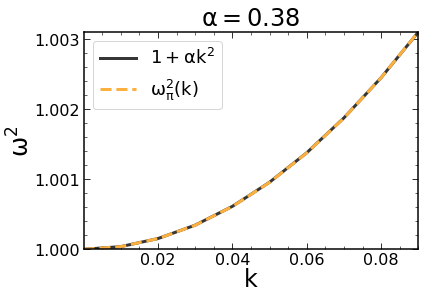

In [5]:
%matplotlib inline

plt.plot(K, f(K, a), color='#363636', label=r'$1 + \alpha k ^ 2$')
plt.plot(K, W ** 2, color='#FBB040', ls='--', label=r'$\omega_\pi ^ 2 (k)$')

plt.title(r'$\alpha = %.2f$' % a)
plt.xlabel(r'$k$')
plt.ylabel(r'$\omega ^ 2$')

plt.legend()
plt.savefig('figures/alpha_pnn_corr_ff_pnd_corr_ff.jpg', dpi=300, format='JPG', bbox_inches='tight')
plt.show()